In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib import style
import scipy.io as sio

#For DTW:
import _ucrdtw
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw


In [148]:
#initialize the starting data
data=sio.loadmat('ECG.mat')
query=sio.loadmat('ECG_query.mat')

print(data)

data=pd.DataFrame(data['ECG'])
query=pd.DataFrame(query['ecg_query'])

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI, Created on: Wed Feb 15 10:40:48 2012', '__version__': '1.0', '__globals__': [], 'ECG': array([[-2.0000e-02],
       [-1.0000e-02],
       [-5.0000e-03],
       ...,
       [-1.6384e+02],
       [-1.6384e+02],
       [-1.6384e+02]])}


## Select a Region of the ECG to be displayed using variables

In [149]:
init=180
length=1000

In [150]:
selected=data[init:init+length]
selected.index=np.arange(0,length)
plt.subplot(2,1,2)
plt.plot(query)


plt.subplot(2,1,1)
plt.title('ECG')
plt.plot(selected)

## Highlight Max Min on the selected region
### Includes finding the index of the points

In [151]:
#Example of finding the max min from a list/array
s = ['1.1881', '1.1881', '1.1881', '1.1881', '1.1881', '1.1881', 
'1.1881', '1.1881', '1.1881', '1.1881', '1.7689', 
'1.7689', '3.4225', '7.7284', '10.24', '9.0601', '9.0601', '9.0601', 
'9.0601', '9.0601'] 

print (type(s))
print (min(s))
print (max(s))

<class 'list'>
1.1881
9.0601


In [152]:
#finding the index of the min and max of a series
maxind=selected.idxmax()
minind=selected.idxmin()

In [153]:
#finding the value of the max min
minval=selected.loc[minind]
maxval=selected.loc[maxind]

<IPython.core.display.Javascript object>


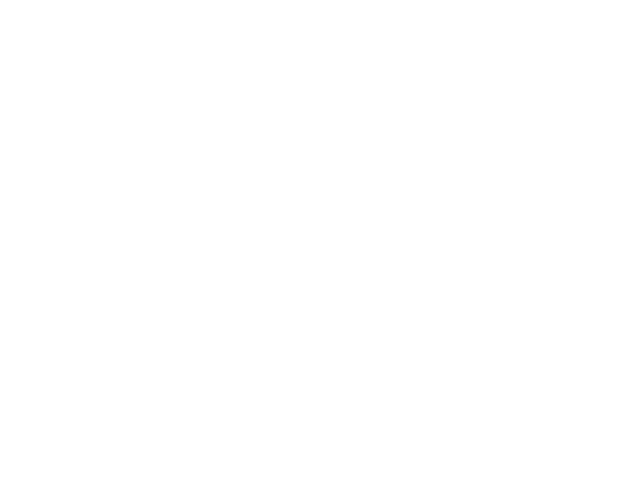

In [154]:
%matplotlib notebook
fig,(ax1,ax2)=plt.subplots(2,1,sharex=True)
fig.suptitle('ECG')
plt.xlabel('index')
plt.ylabel('volts')
ax1.plot(selected)
ax1.plot(selected.loc[maxind],'rx')
ax1.plot(selected.loc[minind],'bx')
ax1.axvline(x=minind.values,color='b',linewidth=0.5)
ax1.axvline(x=maxind.values,color='r',linewidth=0.5)

selected2=data[0:200]
maxind=selected2.idxmax()
minind=selected2.idxmin()
ax2.plot(selected2)
ax2.plot(selected2.loc[maxind],'rx')
ax2.plot(selected2.loc[minind],'bx')
ax2.axvline(x=minind.values,color='b',linewidth=0.5)
ax2.axvline(x=maxind.values,color='r',linewidth=0.5)


#plt.show() #what is this for?

### Save the plot

In [155]:
fig.savefig('minmaxECG.png')#note how that this allows you to select which figure to save

## Select a single point on the graph

## Highlight the part of the graphs that is above a certain value, example above 0.1
### find the index and values that are above 0.1

In [156]:
selected>0.1
val1=selected[selected[0]>0.1]
print(val1.index)


Int64Index([ 27,  28,  29,  30,  31,  81,  82,  83,  84,  85,
            ...
            971, 972, 973, 974, 975, 976, 977, 978, 979, 980],
           dtype='int64', length=170)


### Also includes zeroing all that is below that, such that the plot is flat on values below 0.1

<IPython.core.display.Javascript object>


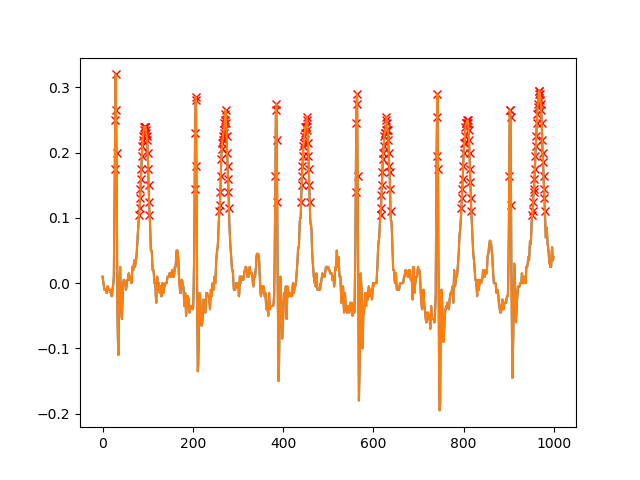

In [157]:
%matplotlib notebook
plt.plot(selected)
plt.plot(val1,'rx')
lindex=~(selected>0.1)
#selected[lindex]=0.1
plt.plot(selected)


# Using DTW
## Distinguish each cycle using DTW
### Find Min and max of each cycle and highlight them

In [158]:
#initialize the starting data
data=sio.loadmat('ECG.mat')
data=pd.DataFrame(data['ECG'])
query=sio.loadmat('ECG_query.mat')
query=np.squeeze(data[8312700:8312850])
data=np.squeeze(data[0:1000000])
#query=pd.DataFrame(query['ecg_query'])

<IPython.core.display.Javascript object>


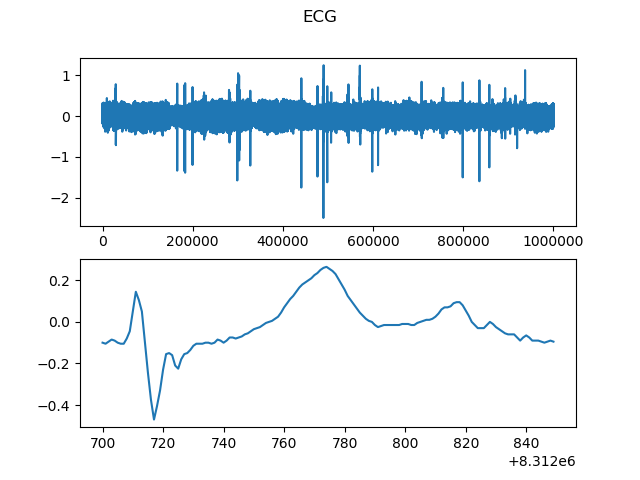

In [159]:
length=len(query)
fig,(ax1,ax2)=plt.subplots(2,1)
fig.suptitle('ECG')
ax1.plot(data)
ax2.plot(query)

In [160]:
i=0

#ncycle=int(input('enter the number of cycles required:'))
ncycle=10
cyclestart=np.zeros([ncycle,])
cycleend=np.zeros([ncycle,])
print(cyclestart)
print(query.shape)
print(data.shape)
print(type(data))
print(type(query))
print(type(0))
print(type(cyclestart[i]))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(150,)
(1000000,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'int'>
<class 'numpy.float64'>


datashape: (999999,)
loc: 64014
datashape: (935985,)
loc: 1627
datashape: (934358,)
loc: 0
datashape: (934358,)
loc: 0


<IPython.core.display.Javascript object>


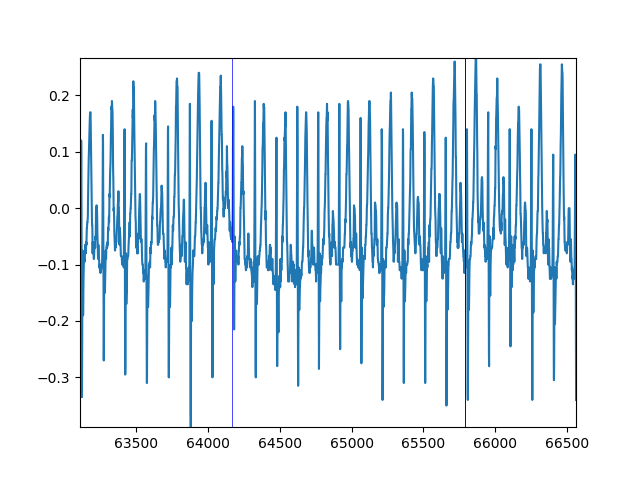

[64014. 65641. 65641. 65641. 65641.     0.     0.     0.     0.     0.]
[64164. 65791. 65791. 65791. 65791.     0.     0.     0.     0.     0.]


In [161]:
while i!=4:
    next=data[int(cycleend[i]):-1]
    next.index=np.arange(0,len(next))
    loc,dist=_ucrdtw.ucrdtw(next.values,query.values,2,True)
    print('datashape:',data[int(cyclestart[i]):-1].shape)
    print('loc:',loc)
    cyclestart[i]+=loc
    cycleend[i]=cyclestart[i]+length
    if i==4:
        break
    cyclestart[i+1]=cyclestart[i]
    cycleend[i+1]=cycleend[i]
    
    #plt.figure()
    i+=1
   
   
plt.figure()
plt.plot(data)
print(cyclestart)
print(cycleend)

plt.show()

In [162]:
for i in cycleend:
    plt.axvline(x=i,color='b',linewidth=0.5)

<IPython.core.display.Javascript object>


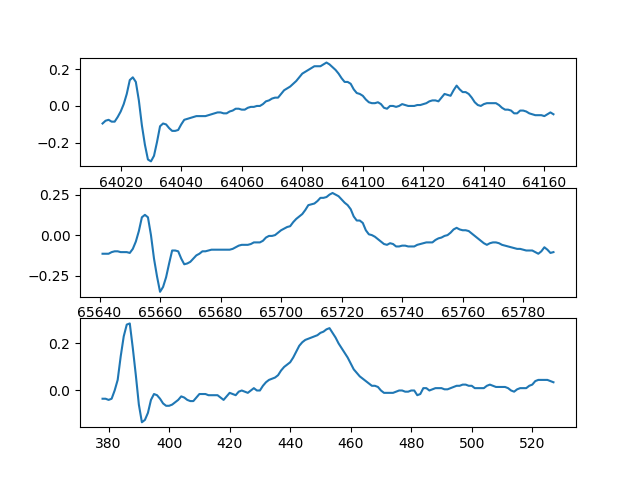

[[1.         0.93555692]
 [0.93555692 1.        ]]
[[1.         0.83730794]
 [0.83730794 1.        ]]
[[1.         0.68328082]
 [0.68328082 1.        ]]
distance of signal 1: 2.3299999999999934
distance of signal 2: 2.2649999999999957
distance of unselected signal: 5.939999999999988


In [163]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1)
ax1.plot(data[int(cyclestart[0]):int(cyclestart[0])+length])
ax2.plot(data[int(cyclestart[1]):int(cyclestart[1])+length])
query.index=np.arange(0,length)
ax3.plot(data[378:378+length])

#print correlation coefficient
print(np.corrcoef(data[int(cyclestart[0]):int(cyclestart[0])+length],query))
print(np.corrcoef(data[int(cyclestart[1]):int(cyclestart[1])+length],query))
print(np.corrcoef(query,data[378:378+length]))

#dtw on graph
distance,path=fastdtw(data[int(cyclestart[0]):int(cyclestart[0])+length],query,dist=euclidean)
print('distance of signal 1:',distance)
distance,path=fastdtw(data[int(cyclestart[1]):int(cyclestart[1])+length],query,dist=euclidean)
print('distance of signal 2:',distance)
distance,path=fastdtw(data[378:378+length],query,dist=euclidean)
print('distance of unselected signal:',distance)

